In [ ]:
#img_url = 'https://cdn.pixabay.com/photo/2016/11/21/22/57/heart-1847868_960_720.png'

#!wget $img_url

#img_path = 'heart-1847868_960_720.png'
img_url = 'https://cdn.pixabay.com/photo/2018/09/18/19/47/crocodile-3687036__480.jpg'

!wget $img_url

img_path = 'crocodile-3687036__480.jpg'

--2020-07-28 19:39:50--  https://cdn.pixabay.com/photo/2018/09/18/19/47/crocodile-3687036__480.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.20.183, 104.18.21.183, 2606:4700::6812:15b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.20.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97048 (95K) [image/jpeg]
Saving to: ‘crocodile-3687036__480.jpg.3’

crocodile-3687036__ 100%[===================>]  94.77K  --.-KB/s    in 0.006s  

2020-07-28 19:39:51 (15.4 MB/s) - ‘crocodile-3687036__480.jpg.3’ saved [97048/97048]



In [ ]:
!pip install imageio

import scipy.misc
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from imageio import imread
from ipywidgets import interact, FloatSlider

%matplotlib inline

def grayscale(img):
    #Один из примеров преведения картинки в ч/б - просто возьмем красный канал 
    return img[:, :,0 ]

def show_img(img):
    #Красиво выводит картинку с помощью matplotlib
    plt.figure(figsize=(10, 6))
    if len(img.shape) == 2:
        plt.imshow(img, cmap=cm.Greys_r)
    else:
        plt.imshow(img)
    plt.axis('off')
    plt.show()
def seed_random(size, seed):
    np.random.seed(seed)
    return np.random.normal(size=size)

def load_img(img_path):
    return imread(img_path) / 255

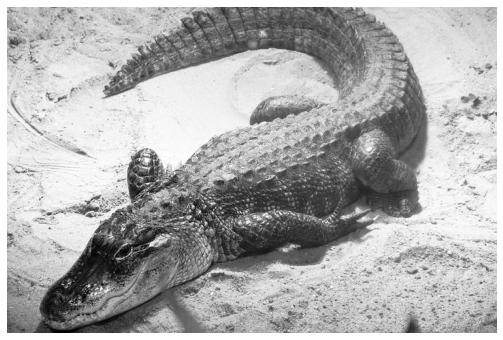

In [ ]:
gray_img = grayscale(load_img(img_path))
show_img(gray_img)

In [ ]:
def convolve(img, kernel):
    """
    Эта функция будет принимать на вход массив с числами, характеризующими картинку 
    img.shape = (y, x), и kernel.shape = (y, x).
    Это самый простой вариант функции, которая работает только с серыми картинками (картинками с одним каналом).
    Свертка должна производиться без padding и stride, добавим их позже.
    Так как у нас один кернел, то и канал у выходной картинки будет один.
    Ничего кроме свертки проихводить не нужно, ни добавлять bias, ни применять функцию активации.
    """
    kernel_y, kernel_x = kernel.shape[:2]
    img_y, img_x = img.shape[:2]

    result = np.zeros((img_y + kernel_y - 1, img_x+ kernel_x - 1))
    for i in range(img_y):
      for j in range(img_x):
        result[i:i+kernel_y,j:j+kernel_x]+=np.multiply( img[i,j],kernel)
    return result

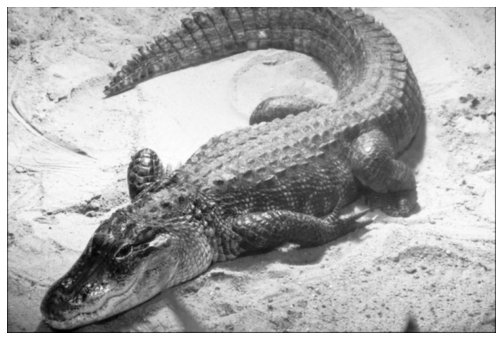

In [ ]:
# применим размывающий фильтр
blur_filter = np.array([[0.0625, 0.125, 0.0625],
                           [0.125, 0.25, 0.125],
                           [0.0625, 0.125, 0.0625]])

blur_img = convolve(gray_img, blur_filter).clip(0, 1)
show_img(blur_img)



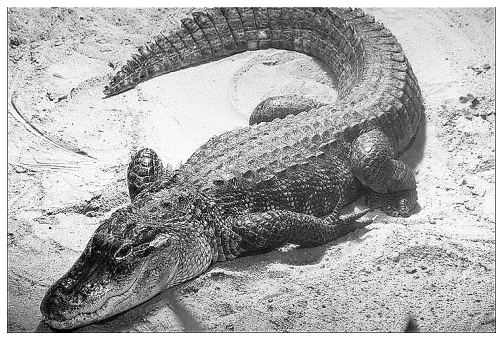

In [ ]:
sharpen_filter = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

sharpened_img = convolve(gray_img, sharpen_filter).clip(0, 1)
show_img(sharpened_img)

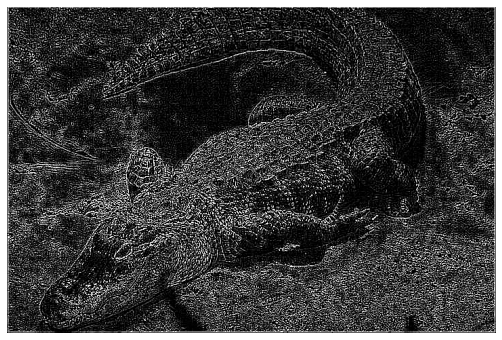

In [ ]:
outline_filter = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])

outline_img = convolve(gray_img, outline_filter).clip(0, 1)
show_img(outline_img)

In [ ]:
def my_operating(img, kernel):
   
    kernel_y, kernel_x = kernel.shape[:2]
    img_y, img_x = img.shape[:2]

    result = np.zeros((img_y + kernel_y - 1, img_x + kernel_x - 1))
    for i in range (img_y):
      for j in range (img_x):
        result[i:i+kernel_y,j:j+kernel_x] *= img[i,j]*kernel
    
    
    
    return result

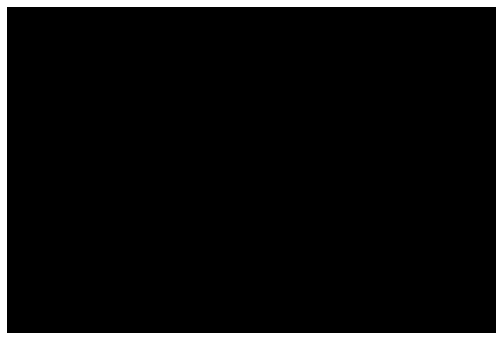

In [ ]:
outline_filter = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])

mi = my_operating(gray_img, outline_filter).clip(0, 1)

show_img(mi)

In [ ]:
np.sum(mi)

0.0

In [ ]:
def f(x):
    return 1/(2 + x**2 * (0.1 + np.sin(x)**2))


def g(x):
    return np.exp(-x**2/2) / np.sqrt(2 * np.pi)


x = np.linspace(-10, 10, 100)
@interact(g_offset=FloatSlider(min=-10, max=10, step=0.5))
def plot_and_calc(g_offset):
    plt.figure(figsize=(10, 7))
    f_val = f(x)
    g_val = g(g_offset - x)
    mul_vals = f_val * g_val

    plt.plot(x, f_val, label='f(x)')
    plt.plot(x, g_val, label='g(x)')
    plt.plot(x, mul_vals, label='f(x)*g(x)')
    plt.gca().fill_between(x, 0, mul_vals)
    plt.legend()

    plt.text(-10.5, 0.55,
             "Approximate conv value at {} = {:.2f}".format(g_offset, mul_vals.sum()))

interactive(children=(FloatSlider(value=0.0, description='g_offset', max=10.0, min=-10.0, step=0.5), Output())…

                    
                    ЗАДАНИЕ 4




In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import torchvision
from torchvision import transforms
from tqdm import tqdm_notebook

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def print_test_loss(net):
    # выбираем функцию потерь
    loss_fn = torch.nn.CrossEntropyLoss()
    
    running_loss = 0.0
    for i, batch in enumerate(tqdm_notebook(testloader)):
        # так получаем текущий батч
        X_batch, y_batch = batch

        # forward + loss calc
        y=net(X_batch)
        loss=loss_fn(y,y_batch)
        loss.backward()

        # добавляем лосс
        running_loss+=loss.item()
    print("Test Loss: {}".format(running_loss / len(testloader)))
    
def train(net):
    # выбираем функцию потерь
    loss_fn = torch.nn.CrossEntropyLoss()


    # выбираем алгоритм оптимизации и learning_rate
    learning_rate = 1e-4
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

    # итерируемся
    for epoch in tqdm_notebook(range(3)):
        running_loss = 0.0
        for i, batch in enumerate(tqdm_notebook(trainloader)):
            # так получаем текущий батч
            X_batch,y_batch=batch

            # обнуляем градиент
            optimizer.zero_grad()

            # forward + backward + optimize
            y=net(X_batch)
            loss=loss_fn(y,y_batch)
            loss.backward()
            optimizer.step()

            # добавим лосс
            running_loss+=loss.item()
            # выведем качество каждые 2000 батчей
            s=0
            if i % 2000 == 1999:
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                s+=running_loss
                running_loss = 0.0


    print('Обучение закончено',)
    print(s,'-test_loss')
    return net

In [ ]:
class SimpleConvNet1(nn.Module):
    def __init__(self):
        # вызов конструктора предка
        super(SimpleConvNet1, self).__init__()
        # необходмо заранее знать, сколько каналов у картинки (сейчас = 1),
        # которую будем подавать в сеть, больше ничего
        # про входящие картинки знать не нужно
        torch.manual_seed(0)
        self.conv1 = nn.Conv2d(3, 6, 5)
        torch.manual_seed(0)
        self.pool = nn.MaxPool2d(2, 2)
        torch.manual_seed(0)
        self.conv2 = nn.Conv2d(6, 16, 5)
        torch.manual_seed(0)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        torch.manual_seed(0)
        self.fc2 = nn.Linear(120, 84)
        torch.manual_seed(0)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [ ]:
net1 = train(SimpleConvNet1())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


[1,  2000] loss: 2.040
[1,  4000] loss: 1.835
[1,  6000] loss: 1.756
[1,  8000] loss: 1.684
[1, 10000] loss: 1.650
[1, 12000] loss: 1.637



[2,  2000] loss: 1.580
[2,  4000] loss: 1.544
[2,  6000] loss: 1.518
[2,  8000] loss: 1.511
[2, 10000] loss: 1.480
[2, 12000] loss: 1.479



[3,  2000] loss: 1.441
[3,  4000] loss: 1.436
[3,  6000] loss: 1.426
[3,  8000] loss: 1.406
[3, 10000] loss: 1.411
[3, 12000] loss: 1.371


Обучение закончено
0 -test_loss


In [ ]:
print_test_loss(SimpleConvNet1())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



Test Loss: 2.3028590366363524


In [ ]:
class SimpleConvNet2(nn.Module):
    def __init__(self):
        # вызов конструктора предка
        super(SimpleConvNet2, self).__init__()
        torch.manual_seed(0)
        self.conv1 = nn.Conv2d(3, 6,5 )
        torch.manual_seed(0)
        self.pool = nn.AvgPool2d(2, 2)
        torch.manual_seed(0)
        self.conv2 = nn.Conv2d(6, 16, 5)
        torch.manual_seed(0)
        self.pool = nn.AvgPool2d(2, 2)
        torch.manual_seed(0)
        self.fc1 = nn.Linear(16*5*5, 120)
        torch.manual_seed(0)
        self.fc2 = nn.Linear(120, 84)
        torch.manual_seed(0)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
       x = self.pool(F.tanh(self.conv1(x)))
       x = self.pool(F.tanh(self.conv2(x)))
       x = F.interpolate(x, size=(5, 5), mode='bilinear')
       x = x.view(-1, 16 * 5 * 5)
       x = F.tanh(self.fc1(x))
       x = F.tanh(self.fc2(x))
       x = self.fc3(x)
       return x
        
    

In [ ]:
net=SimpleConvNet2()
print(net)

SimpleConvNet2(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
net2 = train(SimpleConvNet2())


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


[1,  2000] loss: 2.007
[1,  4000] loss: 1.864
[1,  6000] loss: 1.816
[1,  8000] loss: 1.782
[1, 10000] loss: 1.745
[1, 12000] loss: 1.734



[2,  2000] loss: 1.687
[2,  4000] loss: 1.654
[2,  6000] loss: 1.640
[2,  8000] loss: 1.633
[2, 10000] loss: 1.595
[2, 12000] loss: 1.592



[3,  2000] loss: 1.549
[3,  4000] loss: 1.534
[3,  6000] loss: 1.528
[3,  8000] loss: 1.515
[3, 10000] loss: 1.498
[3, 12000] loss: 1.464


Обучение закончено


In [ ]:
class SimpleConvNet3(nn.Module):
    def __init__(self):
        # вызов конструктора предка
        super(SimpleConvNet3, self).__init__()
        torch.manual_seed(0)
        self.conv1 = nn.Conv2d(3, 64,3 )
        torch.manual_seed(0)
        self.conv2 = nn.Conv2d(64, 64,3 )
        torch.manual_seed(0)
        self.pool = nn.MaxPool2d(2, 2)
        torch.manual_seed(0)
        self.conv3 = nn.Conv2d(64, 64, 3)
        torch.manual_seed(0)
        self.conv4 = nn.Conv2d(64, 64, 3)
        torch.manual_seed(0)
        self.pool = nn.MaxPool2d(2, 2)
        torch.manual_seed(0)
        self.fc1 = nn.Linear(64*5*5, 60)
        torch.manual_seed(0)
        self.fc2 = nn.Linear(60, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1,self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [ ]:
net3 = train(SimpleConvNet3())


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


[1,  2000] loss: 1.942
[1,  4000] loss: 1.645
[1,  6000] loss: 1.545
[1,  8000] loss: 1.451
[1, 10000] loss: 1.421
[1, 12000] loss: 1.375



[2,  2000] loss: 1.281
[2,  4000] loss: 1.266
[2,  6000] loss: 1.256
[2,  8000] loss: 1.213
[2, 10000] loss: 1.182
[2, 12000] loss: 1.152



[3,  2000] loss: 1.078
[3,  4000] loss: 1.060
[3,  6000] loss: 1.049
[3,  8000] loss: 1.026
[3, 10000] loss: 1.018
[3, 12000] loss: 0.980


Обучение закончено
0 -test_loss


In [ ]:
net=SimpleConvNet3()
print(net)

SimpleConvNet3(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=60, bias=True)
  (fc2): Linear(in_features=60, out_features=10, bias=True)
)


In [ ]:
class SimpleConvNet4(nn.Module):
    def __init__(self):
        # вызов конструктора предка
        super(SimpleConvNet4, self).__init__()
        torch.manual_seed(0)
        self.conv1 = nn.Conv2d(3, 64,3 )
        torch.manual_seed(0)
        self.conv2 = nn.Conv2d(64, 64,3 )
        torch.manual_seed(0)
        self.conv3 = nn.Conv2d(64, 64,3 )
        torch.manual_seed(0)
        self.conv4 = nn.Conv2d(64, 64, 3)
        torch.manual_seed(0)
        self.pool = nn.MaxPool2d(2, 2)
        torch.manual_seed(0)
        self.conv5 = nn.Conv2d(64, 128,3 )
        torch.manual_seed(0)
        self.conv6 = nn.Conv2d(128, 128,3 )
        torch.manual_seed(0)
        self.conv7 = nn.Conv2d(128, 128,3 )
        torch.manual_seed(0)
        self.conv8 = nn.Conv2d(128, 128, 3)
        torch.manual_seed(0)
        self.pool = nn.MaxPool2d(2, 2)
        torch.manual_seed(0)
        self.fc1 = nn.Linear(128*2*2, 10)
        torch.manual_seed(0) 
        self.fc2 = nn.Linear(10, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = self.pool(F.relu(self.conv4(x)))
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = F.relu(self.conv7(x))
        x = self.pool(F.relu(self.conv8(x)))
        
        x = x.view(-1,self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
        

In [ ]:
net=SimpleConvNet4()
print(net)

SimpleConvNet4(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
)


In [ ]:
net4 = train(SimpleConvNet4())


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


[1,  2000] loss: 2.272
[1,  4000] loss: 2.163
[1,  6000] loss: 2.030
[1,  8000] loss: 1.952
[1, 10000] loss: 1.899
[1, 12000] loss: 1.843



[2,  2000] loss: 1.796
[2,  4000] loss: 1.768
[2,  6000] loss: 1.727
[2,  8000] loss: 1.688
[2, 10000] loss: 1.644
[2, 12000] loss: 1.604



[3,  2000] loss: 1.536
[3,  4000] loss: 1.504
[3,  6000] loss: 1.460
[3,  8000] loss: 1.434
[3, 10000] loss: 1.419
[3, 12000] loss: 1.381


Обучение закончено
0 -test_loss
